In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dir_prediction_cat = '/home/hhg/Research/galaxyClassify/repo/galaxyZooNet/notebooks/ViT_classifier/'
df_A = pd.read_csv(dir_prediction_cat+'gz2_vit_09172021_0000_predictions.csv')
df_H = pd.read_csv(dir_prediction_cat+'gz2_vit_09192021_2100_predictions.csv')
df_B = pd.read_csv(dir_prediction_cat+'gz2_vit_09182021_1200_predictions.csv')
df_R = pd.read_csv(dir_prediction_cat+'gz2_resnet50_A_predictions.csv')

In [3]:
df_A

,GalaxyID,class,pred
0,272777,5,5
1,207069,3,3
2,125110,5,5
3,206851,5,5
4,122722,0,0
...,...,...,...
31186,23693,4,4
31187,285854,6,3
31188,57768,0,0
31189,158163,0,0


In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [5]:
# galaxy classes
gxy_labels = ['Round Elliptical',
              'In-between Elliptical',
              'Cigar-shaped Elliptical',
              'Edge-on Spiral',
              'Barred Spiral',
              'Unbarred Spiral',
              'Irregular',
              'Merger']

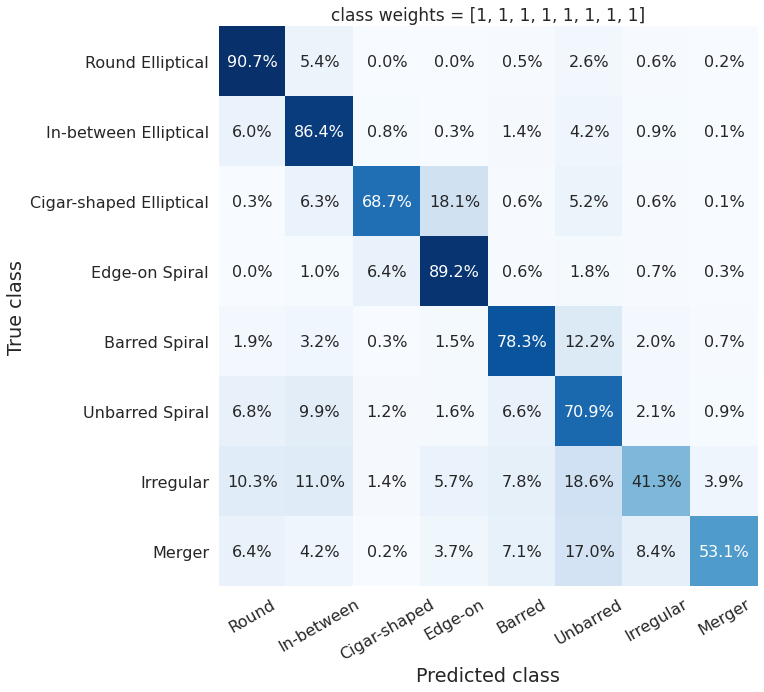

In [6]:
# load Data
y_true = df_A['class']
y_pred = df_A['pred']
title = 'class weights = [1, 1, 1, 1, 1, 1, 1, 1]'

cmap = plt.cm.Blues
#cmap = plt.cm.YlGnBu

labels_short = ['Round', 'In-between', 'Cigar-shaped', 'Edge-on', 'Barred', 'Unbarred', 'Irregular', 'Merger']
labels_full = gxy_labels

# confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')
#cm = confusion_matrix(y_true, y_pred, normalize='pred')
cm_df = pd.DataFrame(cm, index=labels_full, columns=labels_short); xlabel='Predicted class'; ylabel='True class'
#cm_df = pd.DataFrame(cm.T, index=labels_full, columns=labels_short); xlabel='True class'; ylabel='Predicted class'

# plot confusion matrix
sns.set(font_scale=1.6)
fig = plt.figure(figsize=(11, 10))
ax = sns.heatmap(cm_df, annot=True, fmt=".1%", cmap=cmap, cbar=False, annot_kws={"size": 16}) #

ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0 , fontsize=16)

ax.set_title(title, fontsize=17)

plt.tight_layout()
fig.savefig('Mconf_A.pdf')

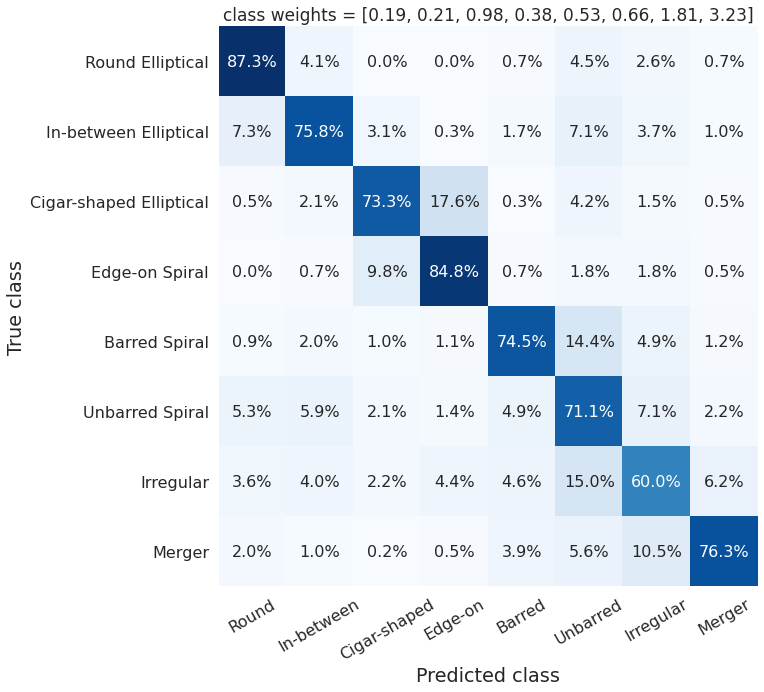

In [7]:
# load Data
y_true = df_H['class']
y_pred = df_H['pred']
title = 'class weights = [0.19, 0.21, 0.98, 0.38, 0.53, 0.66, 1.81, 3.23]'

cmap = plt.cm.Blues
#cmap = plt.cm.YlGnBu

labels_short = ['Round', 'In-between', 'Cigar-shaped', 'Edge-on', 'Barred', 'Unbarred', 'Irregular', 'Merger']
labels_full = gxy_labels

# confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')
#cm = confusion_matrix(y_true, y_pred, normalize='pred')
cm_df = pd.DataFrame(cm, index=labels_full, columns=labels_short); xlabel='Predicted class'; ylabel='True class'
#cm_df = pd.DataFrame(cm.T, index=labels_full, columns=labels_short); xlabel='True class'; ylabel='Predicted class'

# plot confusion matrix
sns.set(font_scale=1.6)
fig = plt.figure(figsize=(11, 10))
ax = sns.heatmap(cm_df, annot=True, fmt=".1%", cmap=cmap, cbar=False, annot_kws={"size": 16}) #

ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0 , fontsize=16)

ax.set_title(title, fontsize=17)

plt.tight_layout()
fig.savefig('Mconf_H.pdf')

In [8]:
class_weights_H = np.array([0.9,1.,4.6,1.8,2.5,3.1,8.5,15.2])

class_weights_H = class_weights_H/class_weights_H.sum()*8.

In [9]:
class_weights_H

array([0.19148936, 0.21276596, 0.9787234 , 0.38297872, 0.53191489,
       0.65957447, 1.80851064, 3.23404255])

## Resnet result

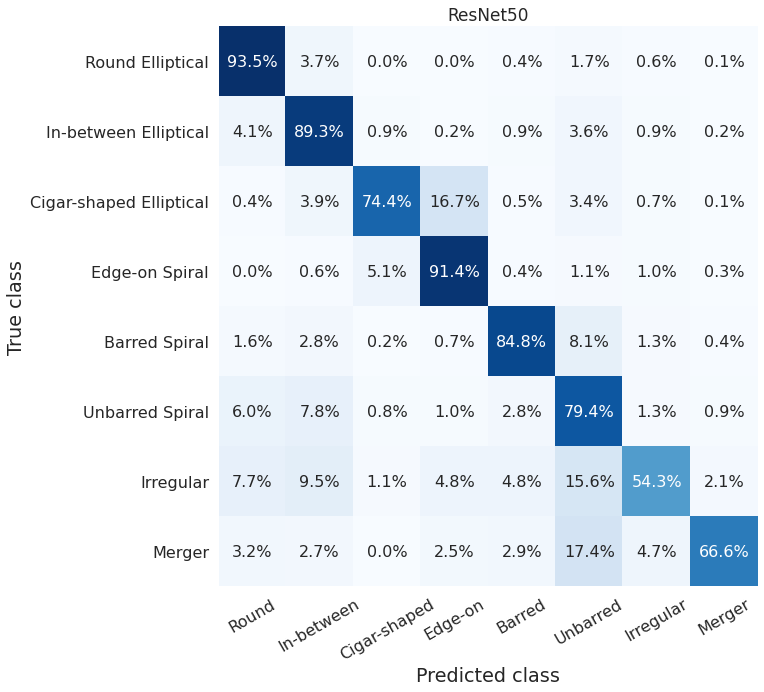

In [10]:
# load Data
y_true = df_R['class']
y_pred = df_R['pred']
title = 'ResNet50'

cmap = plt.cm.Blues
#cmap = plt.cm.YlGnBu

labels_short = ['Round', 'In-between', 'Cigar-shaped', 'Edge-on', 'Barred', 'Unbarred', 'Irregular', 'Merger']
labels_full = gxy_labels

# confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')
#cm = confusion_matrix(y_true, y_pred, normalize='pred')
cm_df = pd.DataFrame(cm, index=labels_full, columns=labels_short); xlabel='Predicted class'; ylabel='True class'
#cm_df = pd.DataFrame(cm.T, index=labels_full, columns=labels_short); xlabel='True class'; ylabel='Predicted class'

# plot confusion matrix
sns.set(font_scale=1.6)
fig = plt.figure(figsize=(11, 10))
ax = sns.heatmap(cm_df, annot=True, fmt=".1%", cmap=cmap, cbar=False, annot_kws={"size": 16}) #

ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0 , fontsize=16)

ax.set_title(title, fontsize=17)

plt.tight_layout()
fig.savefig('Mconf_R.pdf')

### Original code

Class 0: accuracy = 0.8734 (Round Elliptical)
Class 1: accuracy = 0.7580 (In-between Elliptical)
Class 2: accuracy = 0.7327 (Cigar-shaped Elliptical)
Class 3: accuracy = 0.8476 (Edge-on Spiral)
Class 4: accuracy = 0.7449 (Barred Spiral)
Class 5: accuracy = 0.7112 (Unbarred Spiral)
Class 6: accuracy = 0.5998 (Irregular)
Class 7: accuracy = 0.7628 (Merger)
Total Accuracy = 0.7742

Recall = 0.7538

F1 score = 0.7110



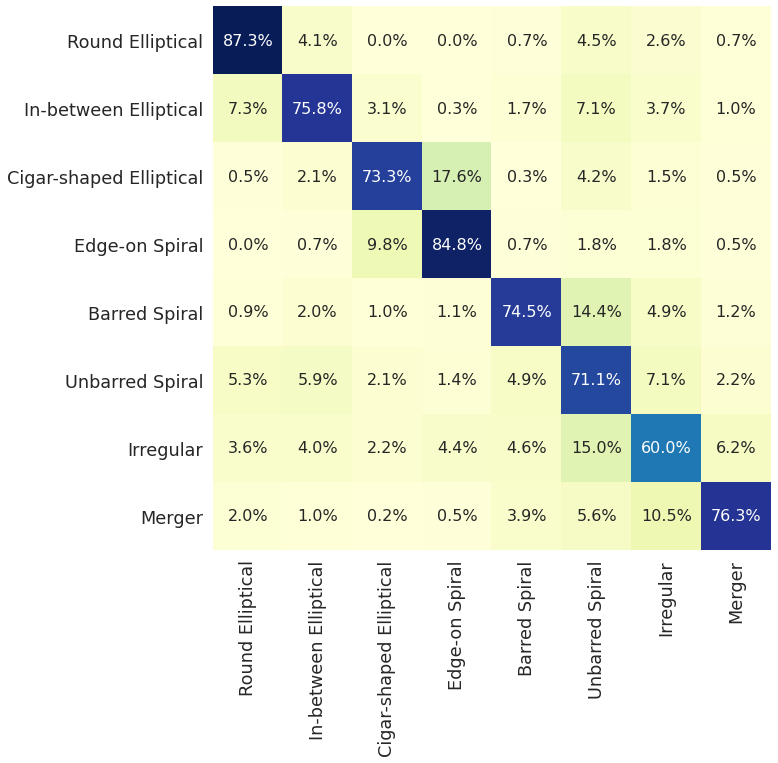

In [11]:
# load Data
y_true = df_H['class']
y_pred = df_H['pred']

# confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')
cm_df = pd.DataFrame(cm, index=gxy_labels, columns=gxy_labels)

# accuracy of each class
for c in range(8):
    print("Class {}: accuracy = {:.4f} ({})".format(c, cm[c,c]/sum(cm[c,:]), gxy_labels[c]))
print("================")

# accuracy
acc = accuracy_score(y_true, y_pred)
print("Total Accuracy = {:.4f}\n".format(acc))

# recall
recall = recall_score(y_true, y_pred, average='macro')
print("Recall = {:.4f}\n".format(recall))

# f1 score
F1 = f1_score(y_true, y_pred, average='macro')
print("F1 score = {:.4f}\n".format(F1))

# plot confusion matrix
sns.set(font_scale=1.6)
fig = plt.figure(figsize=(10, 10))
sns.heatmap(cm_df, annot=True, fmt=".1%", cmap="YlGnBu", cbar=False, annot_kws={"size": 16})
plt.show()